**Problem Statement** : *Distribute a set of robots positioned along a straight line into two equal halves. The positions of the two extreme robots on the line (leftmost and rightmost) are given, as well as the initial positions of the other robots in between. The objective is to divide the robots into two halves, such that one half is on one side of the line and the other half is on the opposite side.*

Enter number of robots: 2
Enter position of robot 1: 1
Enter position of robot 2: 2


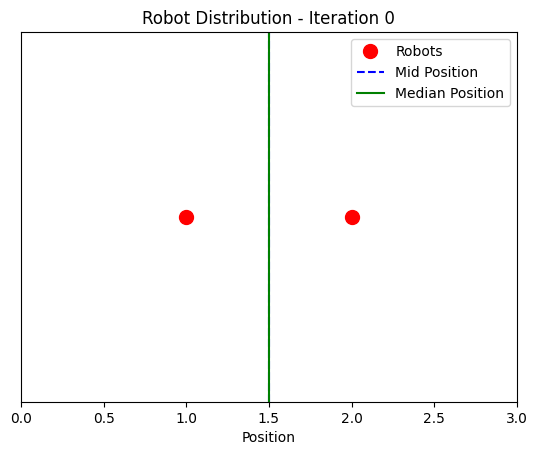

Iterations:   0%|          | 0/100 [00:00<?, ?iteration/s]


Total time taken: 0.03 seconds

Final Robot Positions:
Robot 1: 1.0
Robot 2: 2.0


In [1]:
import sys
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define the Robot class
class Robot:
    def __init__(self, robot_id, position):
        self.robot_id = robot_id
        self.position = position

    def __repr__(self):
        return f"Robot {self.robot_id}: {self.position}"

# Function to plot robot positions
def plot_robots(robots, iteration, mid, median):
    positions = [robot.position for robot in robots]
    plt.clf()  # Clear the previous plot
    plt.plot(positions, [0] * len(positions), 'ro', markersize=10, label="Robots")
    plt.axvline(x=mid, color='blue', linestyle='--', label="Mid Position")
    plt.axvline(x=median, color='green', linestyle='-', label="Median Position")
    plt.title(f"Robot Distribution - Iteration {iteration}")
    plt.xlabel("Position")
    plt.yticks([])
    plt.xlim(min(positions) - 1, max(positions) + 1)
    plt.ylim(-1, 1)
    plt.legend(loc="upper right")  # Add legend
    plt.pause(0.1)

# Function to recursively move robots to avoid collisions
def avoid_collision(new_position, factor, robots_sorted, posL, posR):
    # Ensure the new position is within bounds
    if new_position < posL or new_position > posR:
        return new_position  # Do not move out of bounds

    # Check if the new position is already occupied by another robot
    for robot in robots_sorted:
        if abs(robot.position - new_position) < 1e-6:  # Account for precision errors
            return avoid_collision(new_position + factor, factor, robots_sorted, posL, posR)

    return new_position

# Main execution block
def main():
    # Input the total number of robots
    num = int(input("Enter number of robots: "))
    robots = []  # Initialize an empty list to store Robot objects

    # Input the positions of robots (from 1 to num)
    for i in range(1, num + 1):
        pos = float(input(f"Enter position of robot {i}: "))

        # Append the valid robot (with its ID and position) to the robots list
        robots.append(Robot(i, pos))

    # Sort the robots based on their positions
    robots_sorted = sorted(robots, key=lambda robot: robot.position)

    # After sorting, update posL (leftmost) and posR (rightmost)
    posL = robots_sorted[0].position
    posR = robots_sorted[-1].position

    # Calculate the initial median position based on the number of robots
    if num % 2 == 0:
        median = (robots_sorted[num // 2].position + robots_sorted[num // 2 - 1].position) / 2
    else:
        median = robots_sorted[num // 2].position

    # Calculate the midpoint based on the positions of the leftmost and rightmost robots
    mid = (posL + posR) / 2

    # Main execution block for robot distribution
    iteration = 0
    plot_robots(robots_sorted, iteration, mid, median)  # Plot initial positions

    # Record the start time
    start_time = time.time()

    # Initialize tqdm for tracking iterations
    with tqdm(total=100, desc="Iterations", unit="iteration") as progress_bar:
        while median != mid:
            iteration += 1
            movement_flag = 0

            if median < mid:
                idx = num // 2
                while idx < len(robots_sorted) and robots_sorted[idx].position <= mid:
                    new_position = robots_sorted[idx].position + 0.5
                    new_position = avoid_collision(new_position, 0.5, robots_sorted, posL, posR)
                    robots_sorted[idx].position = new_position
                    movement_flag = 1
                    idx += 1

            else:
                idx = num // 2
                while robots_sorted[idx].position >= mid:
                    new_position = robots_sorted[idx].position - 0.5
                    new_position = avoid_collision(new_position, -0.5, robots_sorted, posL, posR)
                    robots_sorted[idx].position = new_position
                    movement_flag = 1
                    idx -= 1

            if movement_flag == 0:
                break

            if num % 2 == 0:
                median = (robots_sorted[num // 2].position + robots_sorted[num // 2 - 1].position) / 2
            else:
                median = robots_sorted[num // 2].position

            # Plot positions and update tqdm
            plot_robots(robots_sorted, iteration, mid, median)
            progress_bar.update(1)  # Increment progress

    # Record the end time
    end_time = time.time()

    # Calculate the total time taken
    total_time = end_time - start_time
    print(f"\nTotal time taken: {total_time:.2f} seconds")

    # Final robot positions
    print("\nFinal Robot Positions:")
    for robot in robots_sorted:
        print(robot)

if __name__ == "__main__":
    main()